## Data Sourcing and Questions

In [2]:
#Loading the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")
df

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


## Q1. Why does it make sense to discretize columns for this problem?

well for the hours per week bin, the difference between someone working 31 hours per week as opposed to 37 is insignificant comapred to comparing bins of people who have worked 31-40 hours vs 0-30 hours. By binning the data, its clear that one group doesn't work at all while another group is on the higher end or in the middle.

## Q2. What might be the issues (if any) if we DID NOT discretize the columns

For one, there might be a problem with having many outliers on either end which would make the data much more messier and harder to interpret. As a result of this, it might also improve the performance of the machine learning data by condensing the material to be more consistent (lack of outliers). Un-discretized data may also lead to overfitting, or simply harder to interpret results at the end.

# Data Quality Analysis (DQA)

In [6]:
# Finding the total number of columns and entries as well as the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [8]:
#Finding the total number of missing rows in each column
df.isna().sum()

#no missing data

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [7]:
# Descriptive Statistics of each column
df.describe(include="all")

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842.000000
unique,5,5,3,3,3,5,5,2,5,2,NaN
top,b. 31-40,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,NaN
freq,26639,13971,22047,42525,29737,30324,30324,46012,13963,32561,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.239282
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.426649
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [20]:
#Seperate testing and training data 
df_test =df[df['flag']=="test"]
df_train = df[df['flag']=="train"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16281 entries, 32561 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  16281 non-null  object
 1   occupation_bin      16281 non-null  object
 2   msr_bin             16281 non-null  object
 3   capital_gl_bin      16281 non-null  object
 4   race_sex_bin        16281 non-null  object
 5   education_num_bin   16281 non-null  object
 6   education_bin       16281 non-null  object
 7   workclass_bin       16281 non-null  object
 8   age_bin             16281 non-null  object
 9   flag                16281 non-null  object
 10  y                   16281 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1.5+ MB


In [10]:
df_dummies.corr()

,hours_per_week_bin_a. 0-30,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60,occupation_bin_a. Low,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,occupation_bin_e. High,...,workclass_bin_b. income,age_bin_a. 0-25,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55,flag_test,flag_train,y_0,y_1
hours_per_week_bin_a. 0-30,1.000000,-0.479371,-0.055534,-0.219529,-0.126371,0.167214,0.060983,-0.067810,-0.033192,-0.111775,...,-0.181831,0.293776,-0.001217,-0.019523,-0.099226,-0.155874,-0.001307,0.001307,0.176724,-0.176724
hours_per_week_bin_b. 31-40,-0.479371,1.000000,-0.138994,-0.549448,-0.316288,0.006233,0.077653,-0.024198,0.043351,-0.080673,...,0.046377,-0.052991,0.015292,0.001632,0.013949,0.021424,0.002107,-0.002107,0.092061,-0.092061
hours_per_week_bin_c. 71-100,-0.055534,-0.138994,1.000000,-0.063653,-0.036641,-0.015083,-0.002664,0.002032,0.010941,0.007467,...,0.003401,-0.041442,0.003050,0.005750,0.010831,0.019858,0.006258,-0.006258,-0.031432,0.031432
hours_per_week_bin_d. 41-50 & 61-70,-0.219529,-0.549448,-0.063653,1.000000,-0.144845,-0.111427,-0.099634,0.064247,-0.019814,0.135701,...,0.078047,-0.132191,-0.006997,0.012909,0.048426,0.069188,-0.000441,0.000441,-0.179789,0.179789
hours_per_week_bin_e. 51-60,-0.126371,-0.316288,-0.036641,-0.144845,1.000000,-0.067456,-0.078045,0.041095,-0.010580,0.097196,...,0.044980,-0.087651,-0.017799,0.001750,0.032787,0.061438,-0.004404,0.004404,-0.130453,0.130453
occupation_bin_a. Low,0.167214,0.006233,-0.015083,-0.111427,-0.067456,1.000000,-0.250481,-0.263990,-0.095411,-0.241419,...,0.102448,0.158854,0.000617,-0.023151,-0.045887,-0.080982,0.001298,-0.001298,0.187309,-0.187309
occupation_bin_b. Mid - Low,0.060983,0.077653,-0.002664,-0.099634,-0.078045,-0.250481,1.000000,-0.380145,-0.137392,-0.347642,...,-0.411355,0.082217,0.014590,0.006400,-0.030170,-0.063478,0.001303,-0.001303,0.164717,-0.164717
occupation_bin_c. Mid - Mid,-0.067810,-0.024198,0.002032,0.064247,0.041095,-0.263990,-0.380145,1.000000,-0.144802,-0.366392,...,0.156396,-0.037896,-0.010199,0.007083,0.019047,0.018847,-0.003085,0.003085,0.000425,-0.000425
occupation_bin_d. Mid - High,-0.033192,0.043351,0.010941,-0.019814,-0.010580,-0.095411,-0.137392,-0.144802,1.000000,-0.132421,...,0.056735,-0.025751,0.025801,0.004545,-0.001695,0.000124,0.008454,-0.008454,-0.032403,0.032403
occupation_bin_e. High,-0.111775,-0.080673,0.007467,0.135701,0.097196,-0.241419,-0.347642,-0.366392,-0.132421,1.000000,...,0.143354,-0.161451,-0.017665,0.002793,0.049310,0.111271,-0.003414,0.003414,-0.305359,0.305359


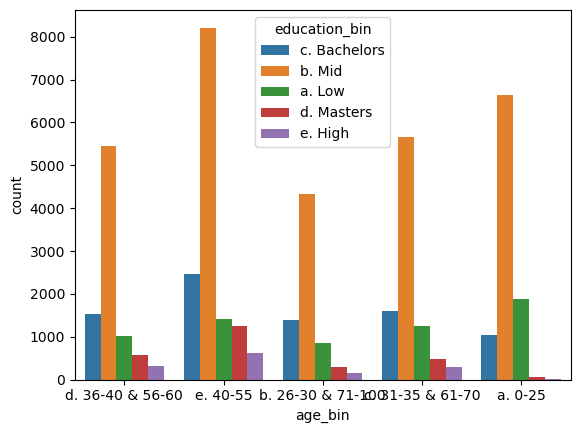

In [3]:
sns.countplot(x='age_bin', hue='education_bin', data=df)
plt.show()

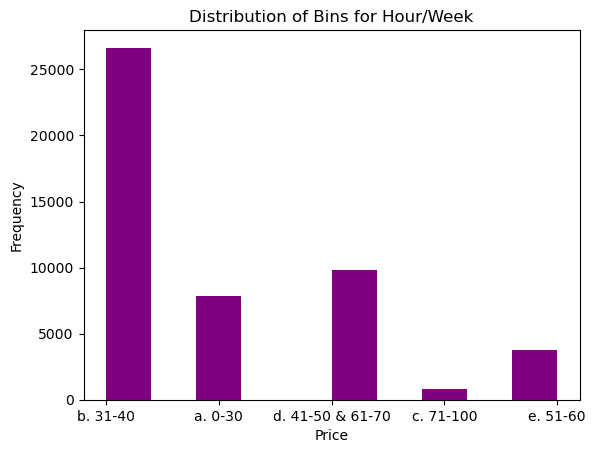

In [31]:
#the distribution of hours per week
plt.hist(df.hours_per_week_bin, color="purple")
plt.ylabel("Frequency")
plt.xlabel ("Price")
plt.title("Distribution of Bins for Hour/Week")
plt.show()

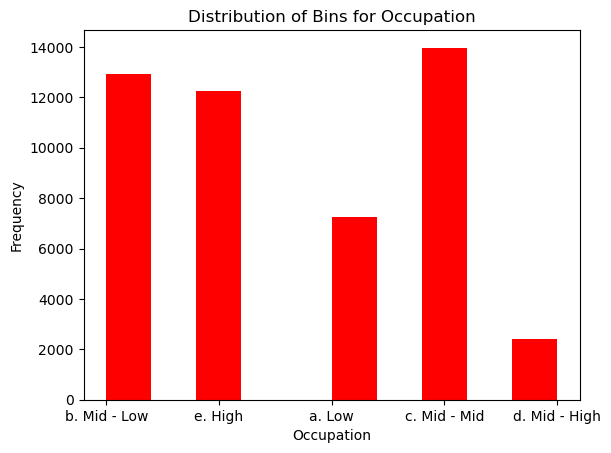

In [32]:
#the distribution of Occupation Bin
plt.hist(df.occupation_bin, color="red")
plt.ylabel("Frequency")
plt.xlabel ("Occupation")
plt.title("Distribution of Bins for Occupation")
plt.show()

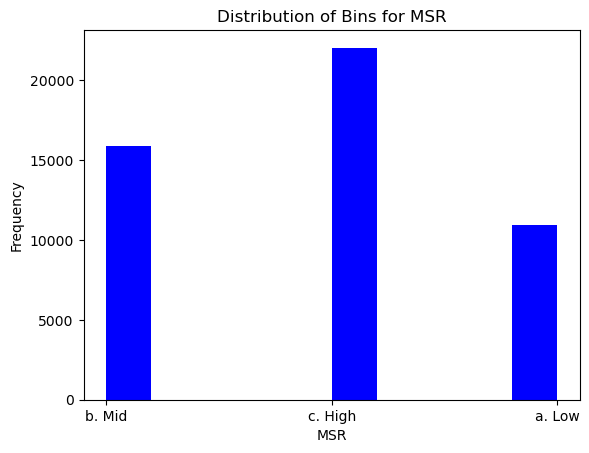

In [34]:
#the distribution of MSR Bin
plt.hist(df.msr_bin, color="blue")
plt.ylabel("Frequency")
plt.xlabel ("MSR")
plt.title("Distribution of Bins for MSR")
plt.show()

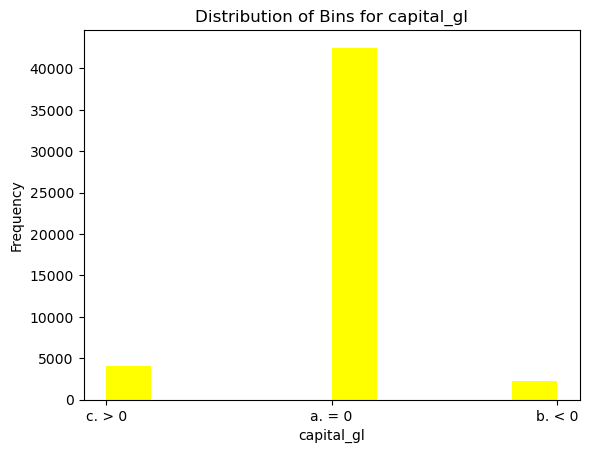

In [36]:
#the distribution of capital_gl Bin
plt.hist(df.capital_gl_bin, color="yellow")
plt.ylabel("Frequency")
plt.xlabel ("capital_gl")
plt.title("Distribution of Bins for capital_gl")
plt.show()

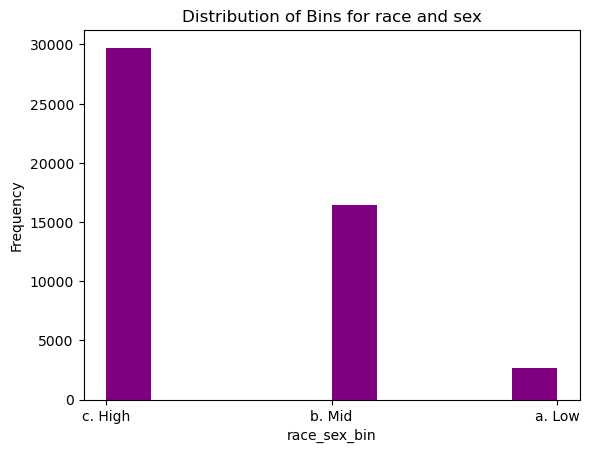

In [38]:
#the distribution of Race and Sex Bin
plt.hist(df.race_sex_bin, color="purple")
plt.ylabel("Frequency")
plt.xlabel ("race_sex_bin")
plt.title("Distribution of Bins for race and sex")
plt.show()

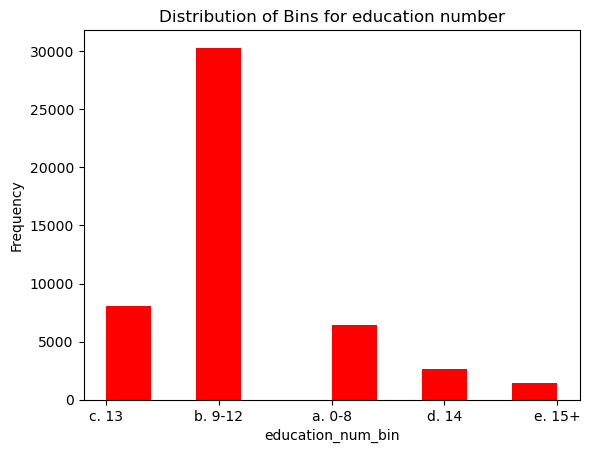

In [47]:
#the distribution of education number Bin
plt.hist(df.education_num_bin, color="red")
plt.ylabel("Frequency")
plt.xlabel ("education_num_bin")
plt.title("Distribution of Bins for education number")
plt.show()

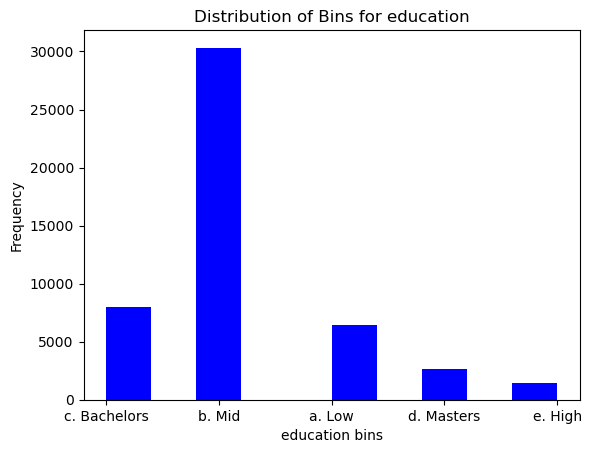

In [46]:
#the distribution of education bin
plt.hist(df.education_bin, color="blue")
plt.ylabel("Frequency")
plt.xlabel ("education bins")
plt.title("Distribution of Bins for education")
plt.show()

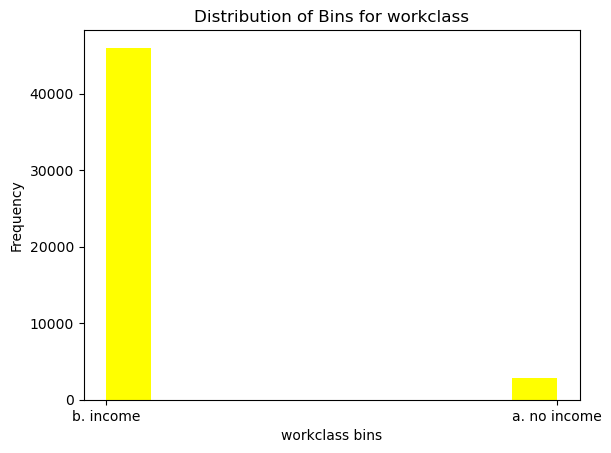

In [45]:
#the distribution of workclass bins
plt.hist(df.workclass_bin, color="yellow")
plt.ylabel("Frequency")
plt.xlabel ("workclass bins")
plt.title("Distribution of Bins for workclass")
plt.show()

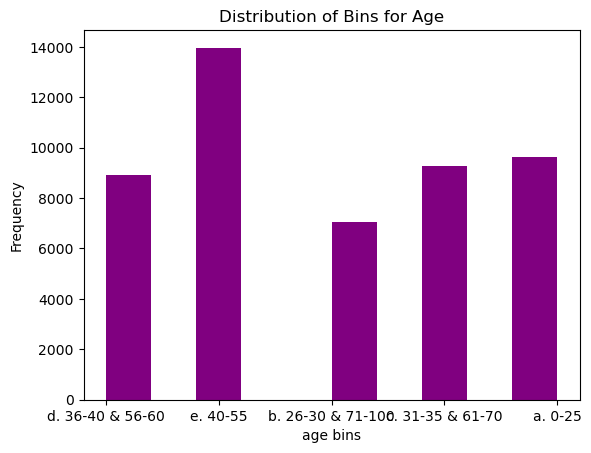

In [44]:
#the distribution of age bins
plt.hist(df.age_bin, color="purple")
plt.ylabel("Frequency")
plt.xlabel ("age bins")
plt.title("Distribution of Bins for Age")
plt.show()

In [48]:
#Finding the mode of each of the features
df.mode()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,0


In [59]:
df.corr()

,y
y,1.0


In [62]:
df_test_dummies = pd.get_dummies(df_test[['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
                                                'race_sex_bin', 'education_num_bin','education_bin', 'workclass_bin',
                                                'age_bin']])

df_train_dummies =pd.get_dummies(df_train[['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
                                                'race_sex_bin', 'education_num_bin','education_bin', 'workclass_bin',
                                                'age_bin']])
y_train = pd.get_dummies(df_train[['y']])
y_test = pd.get_dummies(df_test[['y']])

In [63]:
#importing the Naive Bayes algorithm module Gaussian which is used in classification; it assumes that features follow normal distribution
from sklearn.naive_bayes import GaussianNB 

# using Gaussian Naive Bayes Algorithm
model = GaussianNB()

In [47]:
# Training Naive bayes classifier
print ("Training Model using Gaussian Naive Bayes algorithm .....")
t = model.fit(df_train_dummies, y_train)
print ("Training completed")

Training Model using Gaussian Naive Bayes algorithm .....
Training completed


C:\Users\13235\new_anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
#Test the unseen passangers from test dataset
print ("testing trained model to predict Test Data labels")
y_predicted = model.predict(df_test_dummies)
print ("Completed classification of the Test Data .... now printing Accuracy Score by comparing the Predicted Labels with the Test Labels:")

testing trained model to predict Test Data labels
Completed classification of the Test Data .... now printing Accuracy Score by comparing the Predicted Labels with the Test Labels:


In [49]:
#print accuracy of the model
#In multilabel classification, this function computes subset accuracy

from sklearn.metrics import accuracy_score

# Accuracy score is just percentage of correct predictions
print (accuracy_score(y_test, y_predicted))

0.7871752349364289


In [50]:
# CALCULATE CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

In [74]:
df_table = confusion_matrix(y_test, y_predicted)
print (df_table)


[[11437   998]
 [ 1627  2219]]


In [52]:
# CALCULATE and PRINT AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

C:\Users\13235\new_anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7932386318371915


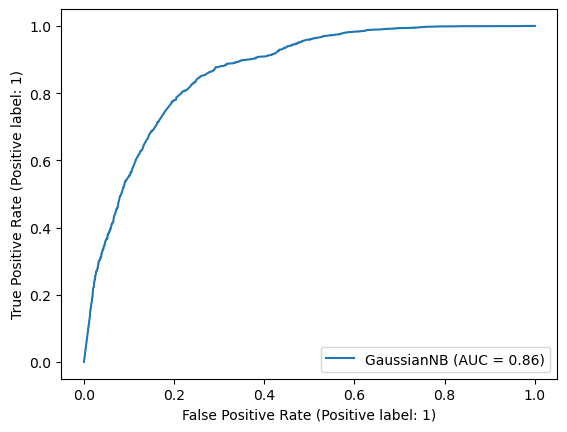

In [54]:
#print roc score 
test_auc = roc_auc_score(y_test, y_predicted)
#ROC AUC Curve
plot_roc_curve(t, df_test_dummies, y_test)

print(test_auc)

## Build Decision Tree Classifier Models 


In [114]:
# Fit a decision tree
from sklearn.tree import DecisionTreeClassifier
t = DecisionTreeClassifier(criterion='entropy', max_depth=3
                           ,random_state=101,max_features=None)
t = t.fit(df_train_dummies, y_train)
y_pred=t.predict(df_test_dummies)

In [115]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=10, random_state=101, max_features = None, min_samples_leaf=15)
dtree.fit(df_train_dummies, y_train)
y_pred=dtree.predict(df_test_dummies)

In [94]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# check for the sklearn version
import sklearn
print(sklearn.__version__)

1.0.2


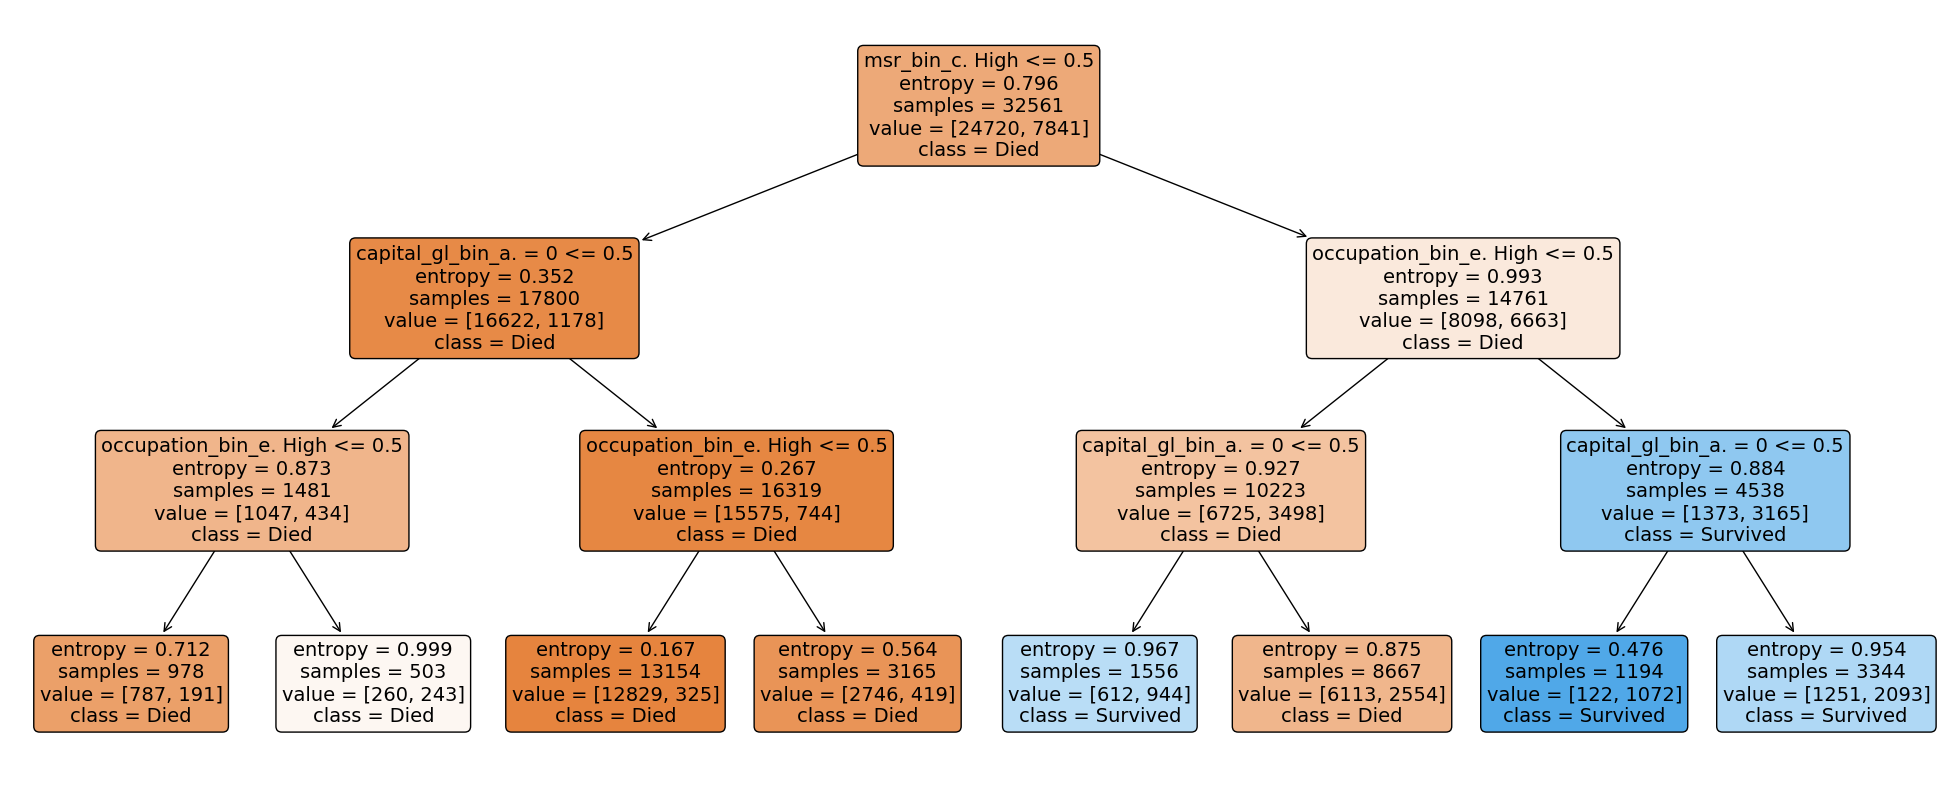

In [116]:
plt.figure(figsize=(25,10))
a = plot_tree(t, feature_names=list(df_train_dummies), class_names=['Died', 'Survived'], 
              filled=True, rounded=True, fontsize=14)

ALGORITHM: RANDOM FOREST CLASSIFIER

In [96]:
from sklearn.ensemble import RandomForestClassifier

t = RandomForestClassifier(n_estimators=100,max_features='auto',random_state=101)
t.fit(df_train_dummies,np.ravel(y_train))
y_predicted=t.predict(df_test_dummies)

## Evaluate Decision Tree Performance

In [103]:
# Check Performance

# Printing classifier report after prediction
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     12435
           1       0.69      0.58      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.75      0.76     16281
weighted avg       0.83      0.84      0.83     16281



ALGORITHM GRADIENT BOOSTING CLASSIFIER

In [110]:
from sklearn.ensemble import GradientBoostingClassifier

t = GradientBoostingClassifier(n_estimators=100)
t.fit(df_train_dummies,np.ravel(y_train))
y_predicted=t.predict(df_test_dummies)


In [111]:
# Check Performance

# Printing classifier report after prediction
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     12435
           1       0.72      0.58      0.64      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.75      0.77     16281
weighted avg       0.84      0.85      0.84     16281



In [ ]:
plit_criteria = ['entropy', 'gini'] 
max_features = [0.1, 0.3, 0.5, 0.7, 0.9, None] 
min_samples_leaf = [1, 5, 10, 20, 50, 100] 
max_depth = [None, 5, 10, 20, 50, 100]

In [148]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

acc_results = []
rec_results = []
prec_results = []
f1_results = []
max_depth_options = [2,4,6,8,10,12,14,16]
split_criteria = ['entropy', 'gini'] 
max_features = ['auto',None, .3, .4, .5, .6, .7, .8] 
min_samples_leaf = [5, 10, 15, 20, 25, 30, 35, 40] 

for sc in split_criteria:
    for mf in max_features:
        for msl in min_samples_leaf:
            for trees in max_depth_options:
                model = DecisionTreeClassifier(max_depth=trees, random_state=101)
                model.fit(df_train_dummies, np.ravel(y_train))
                y_pred = model.predict(df_test_dummies)
                accuracy = np.mean(np.ravel(y_test) == y_pred)
                recall = recall_score(np.ravel(y_test), y_pred)
                precision = precision_score(np.ravel(y_test), y_pred)
                f1 = f1_score(np.ravel(y_test),y_pred)


                acc_results.append(accuracy)
                rec_results.append(recall)
                prec_results.append(precision)
                f1_results.append(f1)

In [127]:
acc_results


[0.8165960321847552,
 0.827590442847491,
 0.8398747005712179,
 0.8418401818070144,
 0.8412259689208279,
 0.8386462747988452,
 0.8385848535102266,
 0.8366193722744303,
 0.8363736871199557,
 0.836496529697193]

In [135]:
rec_results

[0.39781591263650545,
 0.4638585543421737,
 0.5839833593343734,
 0.5517420696827873,
 0.5730629225169007,
 0.5754030161206448,
 0.5696827873114925,
 0.5559022360894436,
 0.5543421736869475,
 0.5538221528861155]

In [138]:
prec_results

[0.6954545454545454,
 0.7054171609331752,
 0.6904395942207193,
 0.713757147662294,
 0.7003495392437242,
 0.690053009042719,
 0.6924778761061947,
 0.6919093851132686,
 0.6917585983127839,
 0.6924577373211963]

In [139]:
f1_results

[0.5061197485941118,
 0.5596862745098039,
 0.6327651781941119,
 0.622378647895586,
 0.6303446303446305,
 0.6275343825322558,
 0.6251069900142654,
 0.6164936562860438,
 0.615473441108545,
 0.6154290667437157]

In [163]:
combination = list(zip(acc_results,rec_results,prec_results,f1_results))
performance = pd.DataFrame(combination, columns=["acc", "rec", "prec", "f1"])

performance['acc'].max()
performance

max_acc_index = performance['acc'].idxmax()
max_acc_row = performance.loc[max_acc_index]

print(max_acc_row)

acc     0.841840
rec     0.551742
prec    0.713757
f1      0.622379
Name: 3, dtype: float64


OPTIMUM HYPERPARAMETERS
max_depth = 8
split_criteria = entropy
min_sample_leaves = 20
max_features = .4

# 6. Visualize Best Decision Tree

In [164]:
# Fit a decision tree
from sklearn.tree import DecisionTreeClassifier
t = DecisionTreeClassifier(criterion='entropy', max_depth=8
                           ,random_state=101,max_features=.4)
t = t.fit(df_train_dummies, y_train)
y_pred=t.predict(df_test_dummies)

In [165]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=8, random_state=101, max_features = .4, min_samples_leaf=20)
dtree.fit(df_train_dummies, y_train)
y_pred=dtree.predict(df_test_dummies)

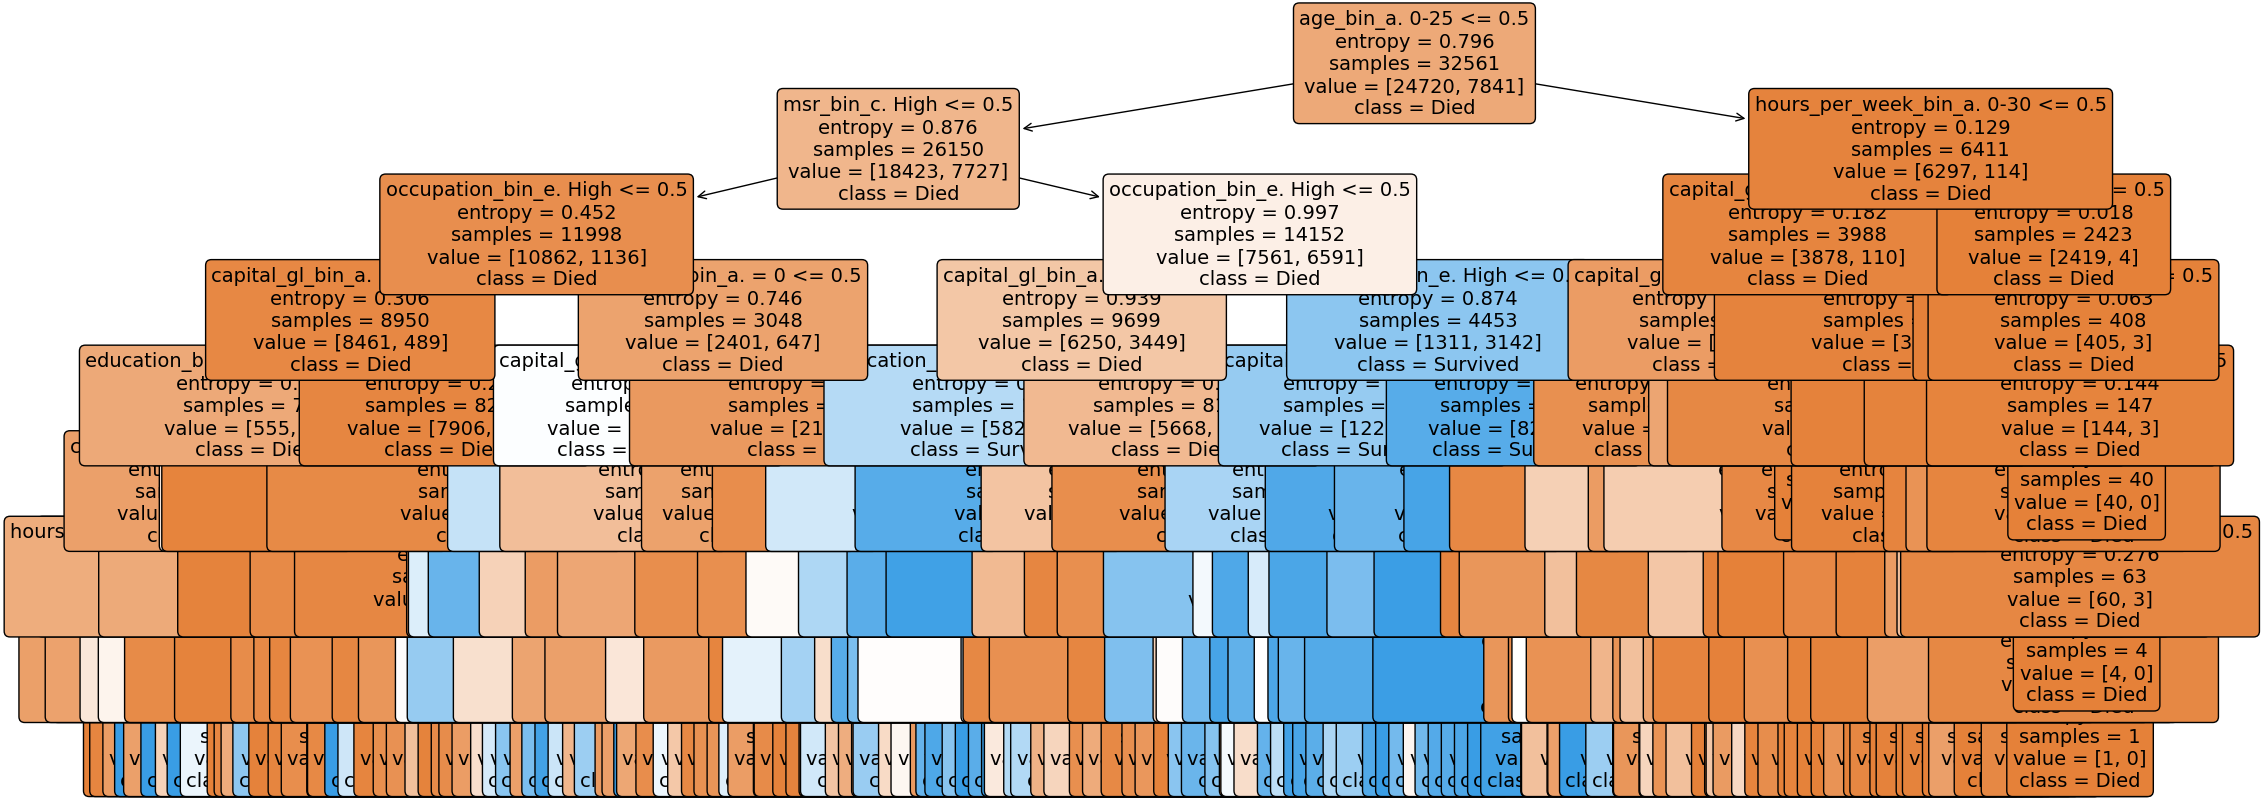

In [166]:
plt.figure(figsize=(25,10))
a = plot_tree(t, feature_names=list(df_train_dummies), class_names=['Died', 'Survived'], 
              filled=True, rounded=True, fontsize=14)

# 7. Conclusion

### Q.4 How long was your total run time to train the best model?
it took around 15ish seconds
### Q.5 Did you find the BEST TREE?
Technicall yes? but I don't think this is the "Best Tree." I believe that the model is extremely overfit 
### Q.6 Write your observations from the visualization of the best tree
There is an uncountable amount of leaf nodes at the bottom and I THINK around 8 levels
### Q.7 Will this Tree “overfit”? (Hint: Is this tree “fully grown”)
yes. Its very overfit